In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import noise_estimation as ne

In [4]:
def get_noise_estimations(image, levels, patch_size=8):
    estimated = []
    for level in levels:
        sigma = level / 255
        noisy_image = image + np.random.randn(*image.shape) * sigma
        est_level = ne.noise_estimate(noisy_image, patch_s=patch_size)
        estimated.append(est_level * 255)

    return np.array(estimated)

/Users/mac/GIT/noise/noise_estimation.py:47: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(tau)


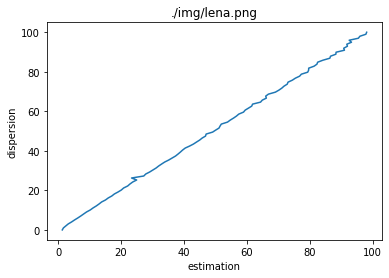

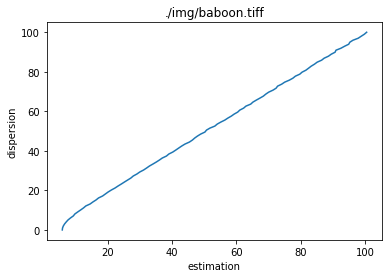

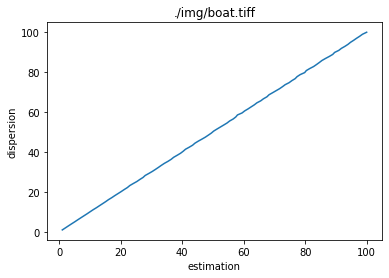

In [5]:
images_path = ["./img/lena.png", "./img/baboon.tiff", "./img/boat.tiff"]
noise_levels = np.linspace(0, 100, 100)
for path in images_path:
    image = cv2.imread(path)
    image = ne.im2double(image)
    
    estimation = get_noise_estimations(image, noise_levels)
    
    plt.figure()
    plt.xlabel('estimation')
    plt.ylabel('dispersion')
    plt.title(path)
    
    plt.plot(estimation, noise_levels)
    figname = "ns_est_" + path[6:-5] + ".jpg"
    plt.savefig(figname)

In [24]:
# Grayscale

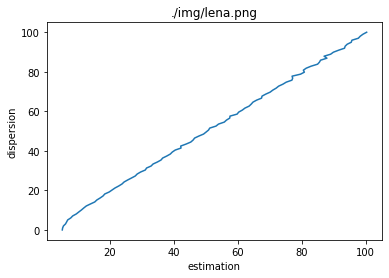

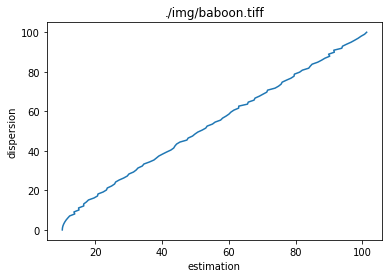

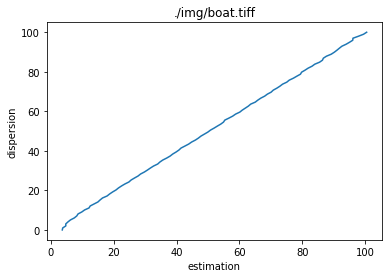

In [25]:
for path in images_path:
    image = cv2.imread(path, 0)
    image = ne.im2double(image)
    
    estimation = get_noise_estimations(image, noise_levels)
    
    plt.figure()
    plt.xlabel('estimation')
    plt.ylabel('dispersion')
    plt.title(path)
    
    plt.plot(estimation, noise_levels)
    figname = "ns_est_" + path[6:-5] + "_g.jpg"
    plt.savefig(figname)

In [5]:
# Импульсный шум
# - случайные изолированные точки на изображении, 
# значения которых значительно отличаются от значений окружающих их точек 
# amount  float, optional
# Proportion of image pixels to replace with noise on range [0, 1]. 
# Used in ‘salt’, ‘pepper’, and ‘salt & pepper’. Default : 0.05
    
# salt_vs_pepper float, optional
# Proportion of salt vs. pepper noise for ‘s&p’ on range [0, 1].
# Higher values represent more salt. Default : 0.5 (equal amounts)

In [6]:
from skimage.util import random_noise

In [7]:
images_path = ["./img/lena.png", "./img/baboon.tiff", "./img/boat.tiff"]
lena_path = images_path[0]

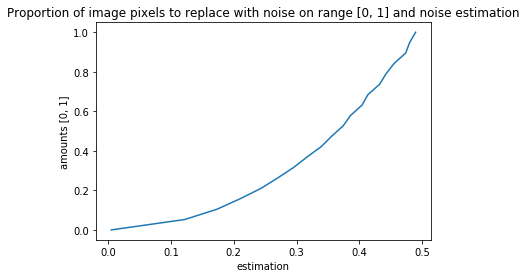

In [10]:
# пропорция пикселей для s&p меняется от 0 до 1, 20 эквидистантных точек
image = cv2.imread(lena_path)
amounts = np.linspace(0, 1, 20)
estimation = []
for amount in amounts:
    noisy_image = random_noise(image, mode='s&p', amount=amount)
    est_level = ne.noise_estimate(noisy_image)
    estimation.append(est_level)
plt.figure()
plt.xlabel('estimation')
plt.ylabel('amounts [0, 1]')
plt.title("Proportion of image pixels to replace with noise on range [0, 1] and noise estimation")
plt.plot(estimation, amounts)

In [ ]:
#s_p_im = random_noise(image, mode='s&p')
#cv2.imshow('Color image', s_p_im)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [27]:
# Зависимость уровня шума от patch_size на примере одной картинки
# patch_size меняется от 1 до 20, уровень шума для одного patch_size меняется от 1 до 100 с шагом 20

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done


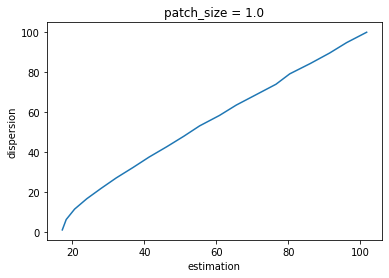

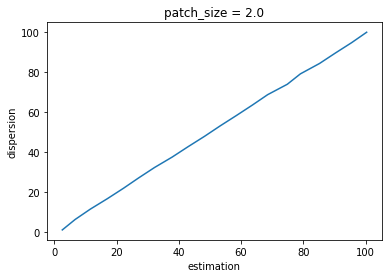

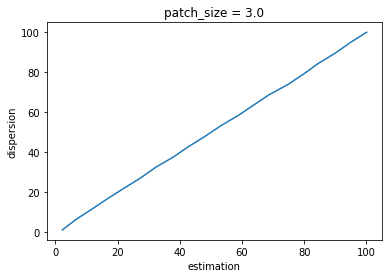

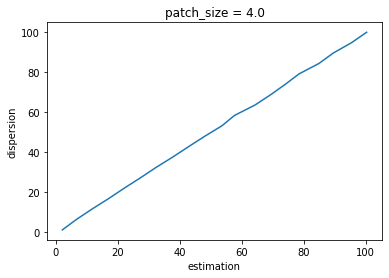

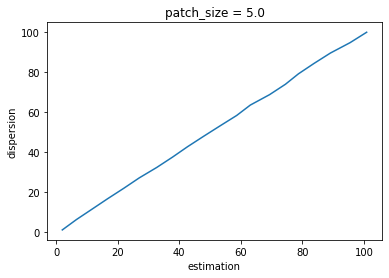

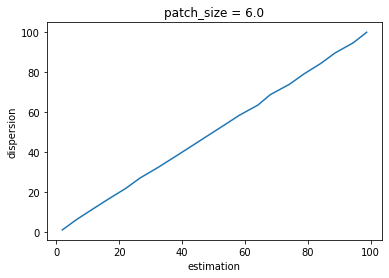

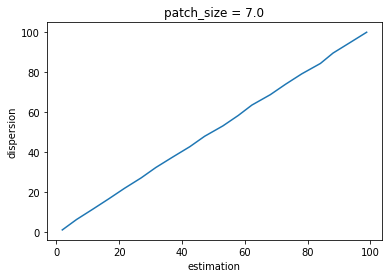

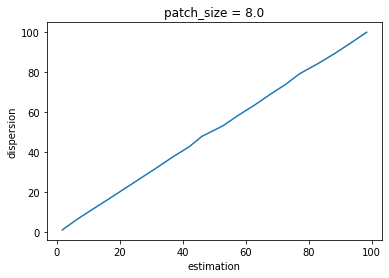

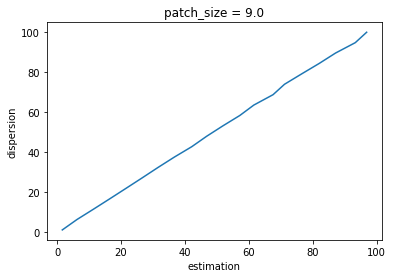

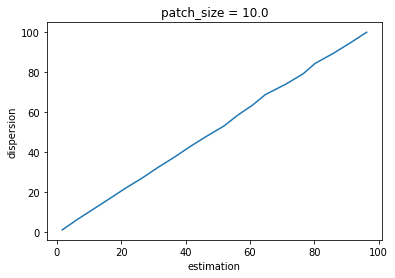

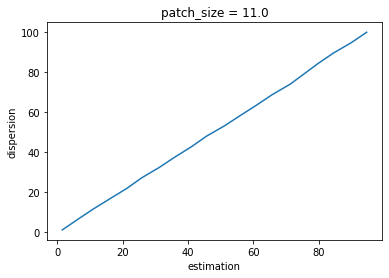

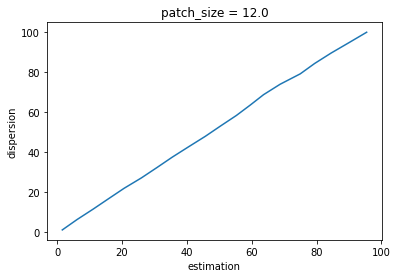

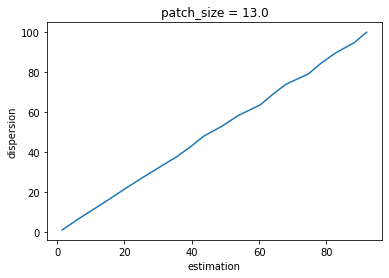

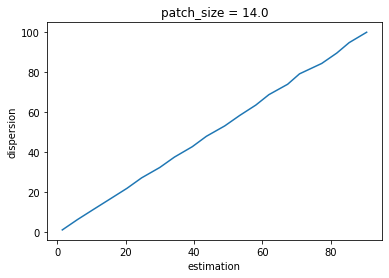

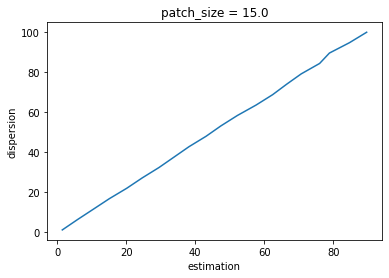

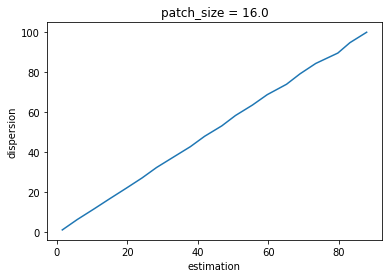

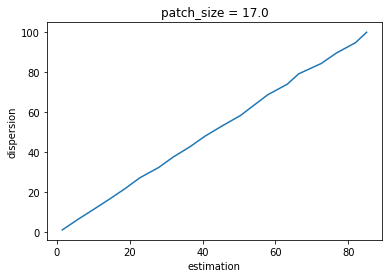

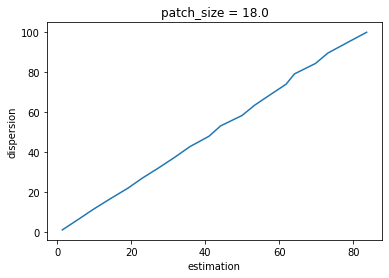

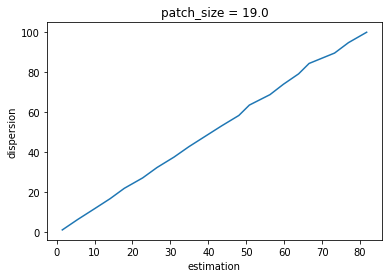

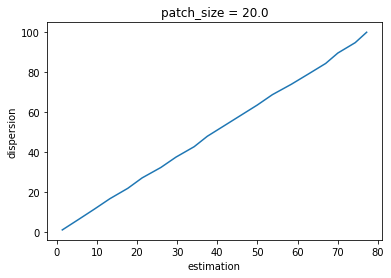

In [7]:
patch_sizes = np.linspace(1, 20, 20)
lena_path = images_path[0]
noise_levels = np.linspace(1, 100, 20)
for (i, patch_size) in enumerate(patch_sizes):
    print("{} done".format(i))
        
    image = cv2.imread(lena_path)
    image = ne.im2double(image)
    
    estimation = get_noise_estimations(image, noise_levels, int(patch_size))
    plt.figure()
    plt.title('patch_size = {}'.format(patch_size))
    plt.xlabel('estimation')
    plt.ylabel('dispersion')
    plt.plot(estimation, noise_levels)
